In [227]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# 1 Markov Chain

In [228]:
transition_mat_A = pd.read_csv("transition_matrix_A.txt", header=None)
transition_mat_A_array = transition_mat_A.to_numpy()

### 1.2 Compute the first left eigenvector of matrix A (corresponding to the largest eigenvalue). Compare this eigenvector to the equilibrium distribution (you can use publicly available packages for computation of eigenvalues and eigenvectors).

In [229]:
eigenvalues, eigenvectors = np.linalg.eig(transition_mat_A)
largest_eigenvalue = np.max(eigenvalues)
largest_eigenvalue_idx = np.argmax(eigenvalues)
first_left_eigenvector = (eigenvectors[:, largest_eigenvalue_idx]).T
first_left_eigenvector = first_left_eigenvector/np.sum(first_left_eigenvector)
print("First left eigenvector is \n", first_left_eigenvector)

First left eigenvector is 
 [0.00999999 0.00999999 0.01000002 0.01       0.01000003 0.01000001
 0.00999999 0.01000003 0.00999997 0.00999999 0.01       0.01000002
 0.00999999 0.00999998 0.01000003 0.01000005 0.00999999 0.01
 0.00999999 0.01000002 0.00999999 0.00999998 0.01       0.01000001
 0.01000004 0.01000001 0.00999998 0.00999998 0.01       0.01
 0.00999999 0.01000002 0.00999999 0.01000002 0.00999998 0.01000001
 0.01000001 0.00999998 0.01       0.00999998 0.00999999 0.00999997
 0.00999998 0.00999997 0.00999998 0.01000003 0.01000001 0.01
 0.00999999 0.01000001 0.01       0.01000001 0.00999999 0.00999999
 0.01000005 0.01000001 0.01000001 0.01000002 0.00999999 0.01000001
 0.01000001 0.01000005 0.01000001 0.01000003 0.01000003 0.01000002
 0.00999998 0.01000002 0.01       0.00999998 0.01000003 0.01
 0.01000002 0.00999996 0.01000004 0.00999995 0.01       0.01
 0.00999997 0.00999999 0.00999998 0.00999997 0.01000001 0.01000001
 0.01       0.00999998 0.01000002 0.00999998 0.01       0.009999

### 1.3 Simulate a markov chain using the above matrix A by Sampling the first state X0 (e.g. based on uniform distribution) and Jumping from state Xi to state Xi+1, according to the transition probability defined by 1.1

In [230]:
transition_mat_A_normalized = transition_mat_A_array/transition_mat_A_array.sum(axis=1, keepdims=True)
def markov_chain_simulation(transition_matrix, num_simulations):
    traveled_states =[]
    total_states = transition_matrix.shape[0]
    state = np.random.randint(total_states)
    for i in range(num_simulations):
        state = np.random.choice(total_states, p=transition_matrix[state])
        traveled_states.append(state)
    return traveled_states
markov_chain_states = markov_chain_simulation(transition_mat_A_normalized, 100)
print("The markov chain states for 100 simulations are", markov_chain_states)


The markov chain states for 100 simulations are [19, 5, 57, 36, 35, 27, 25, 45, 75, 73, 73, 55, 67, 98, 23, 69, 62, 81, 90, 10, 84, 26, 79, 58, 41, 7, 68, 11, 27, 8, 95, 6, 9, 80, 62, 11, 49, 54, 88, 96, 25, 68, 7, 45, 6, 99, 75, 45, 39, 66, 15, 51, 94, 47, 13, 44, 83, 55, 89, 24, 8, 25, 91, 97, 54, 84, 18, 88, 91, 45, 15, 90, 63, 8, 50, 62, 8, 21, 29, 31, 87, 75, 40, 99, 82, 86, 14, 52, 48, 39, 38, 96, 17, 29, 47, 52, 85, 92, 8, 49]


### 1.4 For M = 10, 000, what is the portion of time the Markov chain spends in each of the 100 states? Compare this distribution to the expected equilibrium distribution using Euclidian distance between the two distributions as a metric. How fast the distribution approaches the expected distribution as M increases?

In [231]:
def get_frequency_distribution(states, M_val):
    observed_distribution = []
    for i in range(100):
        observed_distribution.append((states.count(i))/M_val)
    return observed_distribution

def compare_distributions(obs_dist, exp_dist):
    euc_dist = np.linalg.norm(obs_dist - exp_dist)
    return euc_dist

def increasing_M_comparison(M, expected_dist, trans_mat):
    euc_distances_across_M = dict()
    for i in range(1, M+1):
        mc_states = markov_chain_simulation(trans_mat, i)
        obs_dist = get_frequency_distribution(mc_states, i)
        # print(len(obs_dist))
        dist = compare_distributions(obs_dist, expected_dist)
        euc_distances_across_M[i] = dist  
    return euc_distances_across_M

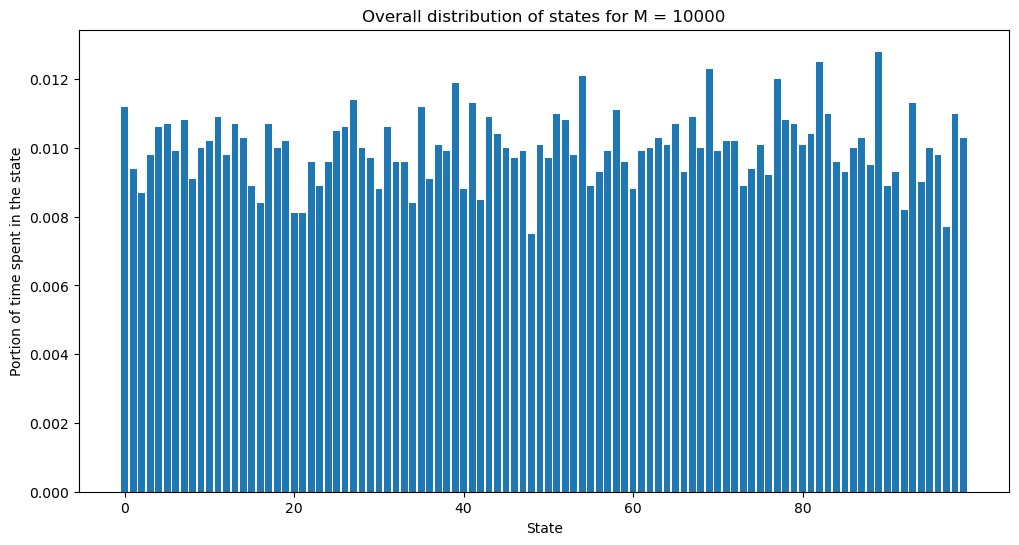

In [232]:
M = 10000
mc_states = markov_chain_simulation(transition_mat_A_normalized, M)
dist = get_frequency_distribution(mc_states, M)
num_states = len(dist)

plt.figure(figsize=(12, 6))
plt.bar(range(num_states), dist)
plt.xlabel('State')
plt.ylabel('Portion of time spent in the state')
plt.title('Overall distribution of states for M = 10000')
plt.xticks(range(0, num_states, 20))  
plt.show()

In [233]:
convergence = increasing_M_comparison(M, first_left_eigenvector, transition_mat_A_normalized)

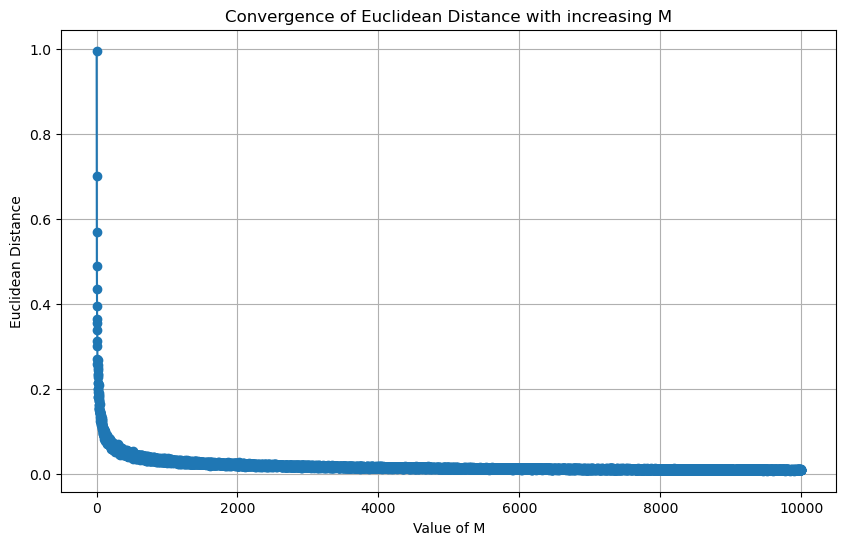

In [234]:
Ms = list(convergence.keys())
euclidean_distances = list(convergence.values())
plt.figure(figsize=(10, 6))
plt.plot(Ms, euclidean_distances, marker='o', linestyle='-')
plt.xlabel('Value of M')
plt.ylabel('Euclidean Distance')
plt.title('Convergence of Euclidean Distance with increasing M')
plt.grid(True)
plt.show()

# 2 MCMC

In [235]:
transition_mat_B = pd.read_csv("transition_matrix_B.txt", header=None).to_numpy()
# transition_mat_B = transition_mat_B/transition_mat_B.sum(axis=1, keepdims=True)
equilibrium = pd.read_csv("desired_equilibrium_distribution.txt", header=None).to_numpy()
equilibrium = equilibrium.reshape(1,-1)[0]
# equilibrium

### 2.1 Use the Metropolis-Hasting approach to MCMC, for introducing rejection probabilities in the probability transition matrix such that the equilibrium probability distribution is equal to Pdesired from desired equilibrium distribution.txt.

In [247]:
def get_acceptance_probs(transition_mat, equi):
    acceptance_probs = np.zeros((len(transition_mat), len(transition_mat)))
    # p[j]*A[i,j] /(p[i]*A[j,i])
    for i in range(len(transition_mat)):
        for j in range(len(transition_mat)):
            R_num = equi[i] * transition_mat[i,j]
            R_den = equi[j] * transition_mat[j,i]
            # R = min(1, (R_den/R_num))
            R = min(1, (R_num/R_den))
            acceptance_probs[i,j] = R 
    return acceptance_probs
r = get_acceptance_probs(transition_mat_B, equilibrium)

print("The acceptance probabilities are \n", r)
print("The rejection probabilities are \n", 1-r)


The acceptance probabilities are 
 [[1.         0.99997358 0.99996976 ... 1.         1.         0.99997954]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.99999243 1.         ... 1.         1.         0.99999386]
 ...
 [0.99998843 0.99996224 0.99997199 ... 1.         0.99996026 0.99993759]
 [0.99999323 0.99995315 0.99997655 ... 1.         1.         1.        ]
 [1.         0.99995864 1.         ... 1.         0.99999733 1.        ]]
The rejection probabilities are 
 [[0.00000000e+00 2.64217086e-05 3.02435629e-05 ... 0.00000000e+00
  0.00000000e+00 2.04643974e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.56796721e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.13755720e-06]
 ...
 [1.15693572e-05 3.77602778e-05 2.80124978e-05 ... 0.00000000e+00
  3.97392223e-05 6.24100654e-05]
 [6.77254700e-06 4.68477684e-05 2.34501128e-05 ... 0.00000000e+00
  0.00000000e+00 0.0

### 2.2 Compute the probability transition matrix B after applying the rejection probabilities.

In [237]:
def compute_modified_transition_matrix(transition_mat, acc_probs):
    new_transition_mat = transition_mat * acc_probs
    normalized_new_transition_mat = np.zeros((len(new_transition_mat), len(new_transition_mat)))
    sums = np.sum(new_transition_mat, axis=1)
    for i in range(len(transition_mat)):
        for j in range(len(transition_mat[0])):
            normalized_new_transition_mat[i,j] = new_transition_mat[i,j]* 1/sums[i]
    return normalized_new_transition_mat, new_transition_mat
    
normalized_mat_B, new_B_transition_mat = compute_modified_transition_matrix(transition_mat_B, r)
print("The transition matrix after applying acceptance probabilities\n", new_B_transition_mat)

The transition matrix after applying acceptance probabilities
 [[0.16225    0.00907766 0.00631501 ... 0.0017009  0.0057516  0.01314573]
 [0.0046159  0.40835    0.0092845  ... 0.0018819  0.010496   0.0085875 ]
 [0.0027566  0.00797014 0.47701    ... 0.0026432  0.0032366  0.00550127]
 ...
 [0.00274807 0.00597947 0.00978343 ... 0.10304    0.01527739 0.01176127]
 [0.00524896 0.01883712 0.00676684 ... 0.0086301  0.18834    0.014253  ]
 [0.0082995  0.01066156 0.0079569  ... 0.0045962  0.00985967 0.29637   ]]


### 2.3 Compute the first left eigenvector of matrix B (corresponding to the largest eigenvalue). Compare this eigenvector to the desired equilibrium distribution

In [238]:
eigenvalues, eigenvectors = np.linalg.eig(transition_mat_A)
largest_eigenvalue = np.max(eigenvalues)
largest_eigenvalue_idx = np.argmax(eigenvalues)
first_left_eigenvector = (eigenvectors[:, largest_eigenvalue_idx]).T
first_left_eigenvector = first_left_eigenvector/np.sum(first_left_eigenvector)
print("First left eigenvector is \n", first_left_eigenvector)

First left eigenvector is 
 [0.00999999 0.00999999 0.01000002 0.01       0.01000003 0.01000001
 0.00999999 0.01000003 0.00999997 0.00999999 0.01       0.01000002
 0.00999999 0.00999998 0.01000003 0.01000005 0.00999999 0.01
 0.00999999 0.01000002 0.00999999 0.00999998 0.01       0.01000001
 0.01000004 0.01000001 0.00999998 0.00999998 0.01       0.01
 0.00999999 0.01000002 0.00999999 0.01000002 0.00999998 0.01000001
 0.01000001 0.00999998 0.01       0.00999998 0.00999999 0.00999997
 0.00999998 0.00999997 0.00999998 0.01000003 0.01000001 0.01
 0.00999999 0.01000001 0.01       0.01000001 0.00999999 0.00999999
 0.01000005 0.01000001 0.01000001 0.01000002 0.00999999 0.01000001
 0.01000001 0.01000005 0.01000001 0.01000003 0.01000003 0.01000002
 0.00999998 0.01000002 0.01       0.00999998 0.01000003 0.01
 0.01000002 0.00999996 0.01000004 0.00999995 0.01       0.01
 0.00999997 0.00999999 0.00999998 0.00999997 0.01000001 0.01000001
 0.01       0.00999998 0.01000002 0.00999998 0.01       0.009999

In [239]:
eigenvalues, eigenvectors = np.linalg.eig(new_B_transition_mat)
largest_eigenvalue_matB = np.max(eigenvalues)
largest_eigenvalue_idx_matB = np.argmax(eigenvalues)
first_left_eigenvector_matB = (eigenvectors[:, largest_eigenvalue_idx_matB]).T
first_left_eigenvector_matB = first_left_eigenvector_matB/np.sum(first_left_eigenvector_matB)
first_left_eigenvector_matB = first_left_eigenvector_matB.reshape(1,100)
print("First left eigenvector is \n", first_left_eigenvector_matB)

First left eigenvector is 
 [[0.00999996 0.01000018 0.01000018 0.01000013 0.01000003 0.01000004
  0.00999999 0.01000015 0.00999991 0.00999988 0.00999995 0.00999998
  0.01000019 0.01000003 0.01000021 0.01000008 0.00999995 0.00999981
  0.00999984 0.01       0.00999959 0.00999997 0.00999994 0.01000004
  0.00999975 0.01000014 0.00999999 0.00999991 0.01000016 0.01000006
  0.01000004 0.00999996 0.00999995 0.00999997 0.01000005 0.00999998
  0.01000006 0.00999993 0.01000002 0.00999989 0.00999991 0.01000007
  0.01000008 0.00999999 0.00999989 0.00999998 0.0100001  0.00999993
  0.01000003 0.00999984 0.0099998  0.0100001  0.00999985 0.01000007
  0.01000005 0.00999995 0.00999996 0.01000002 0.00999984 0.01
  0.01000014 0.01000015 0.01000013 0.01000009 0.00999997 0.01
  0.01000009 0.01000008 0.01000004 0.01000005 0.00999995 0.01000001
  0.01000015 0.01000005 0.01000019 0.00999995 0.00999989 0.01000003
  0.01000004 0.00999996 0.01000009 0.00999986 0.01000016 0.01000011
  0.01000008 0.00999977 0.009999

In [240]:
distance = np.linalg.norm(equilibrium - first_left_eigenvector_matB)
print(distance)

0.051140682662631505


The euclidean distance between approximate equilibrium distribution after M=10,000 and the desired equilibrium distribution is  0.012585586785545347


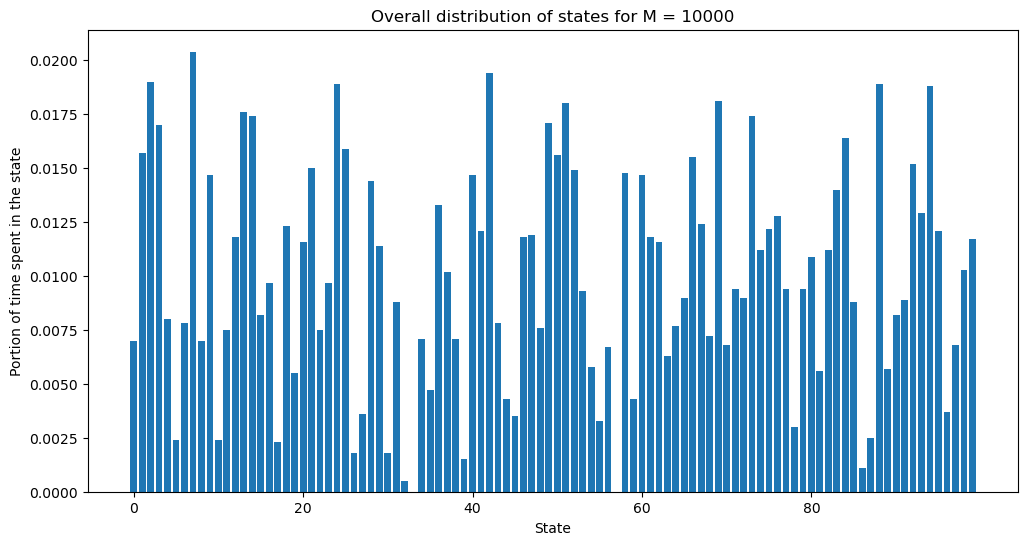

In [246]:
M = 10000
mc_states_mat_B = markov_chain_simulation(normalized_mat_B, M)
distribution = get_frequency_distribution(mc_states_mat_B, M)
print("The euclidean distance between approximate equilibrium distribution after M=10,000 and the desired equilibrium distribution is ", np.linalg.norm(equilibrium - distribution) )
num_states = len(distribution)

plt.figure(figsize=(12, 6))
plt.bar(range(num_states), distribution)
plt.xlabel('State')
plt.ylabel('Portion of time spent in the state')
plt.title('Overall distribution of states for M = 10000')
plt.xticks(range(0, num_states, 20))  
plt.show()

### 2.4 Simulate a Markov chain using matrix B and approximate equilibrium distribution after M=10,000 samples. Compare this equilibrium distribution to the desired equilibrium distribution (using Euclidean distance metric).

In [242]:
convergence_B = increasing_M_comparison(M, equilibrium, normalized_mat_B)

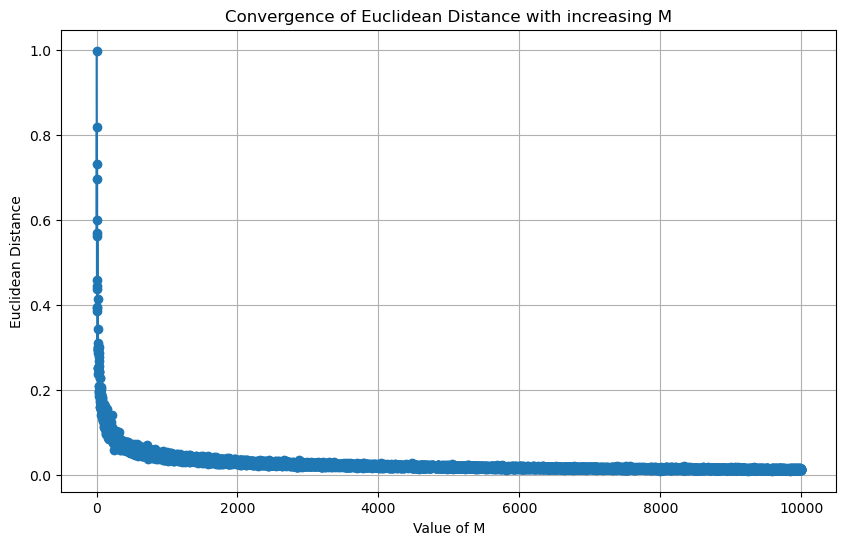

In [243]:
Ms = list(convergence.keys())
euclidean_distances = list(convergence_B.values())
plt.figure(figsize=(10, 6))
plt.plot(Ms, euclidean_distances, marker='o', linestyle='-')
plt.xlabel('Value of M')
plt.ylabel('Euclidean Distance')
plt.title('Convergence of Euclidean Distance with increasing M')
plt.grid(True)
plt.show()